In [1]:
import pandas as pd

In [4]:
print("All the figures in the dataframes below are in the order of Millions.")

All the figures in the dataframes below are in the order of Millions.


In [2]:
Apple_df = pd.read_csv("Apple (AAPL)_financials.csv")
display(Apple_df)

,Total Revenue,Total Cost of Sales,Net Income,Total Assets,Total Liabilities,Year
0,394328,223546,99803,352755,153982,2022
1,383285,214137,96995,352583,145308,2023
2,391035,210352,93736,364980,176932,2024


In [3]:
Microsoft_df = pd.read_csv("Microsoft (MSFT)_financials.csv")
display(Microsoft_df)

,Total Revenue,Total Cost of Sales,Net Income,Total Assets,Total Liabilities,Year
0,198270,62650,72738,364840,198298,2022
1,211915,65863,72361,411976,205753,2023
2,245122,74114,88136,512163,243686,2024


In [5]:
Tesla_df = pd.read_csv("Tesla (TSLA)_financials.csv")
display(Tesla_df)

,Total Revenue,Total Cost of Sales,Net Income,Total Assets,Total Liabilities,Year
0,53823,40217,5644,62131,30548,2022
1,81462,60609,12587,82338,36440,2023
2,96773,79113,14974,106618,43009,2024


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Tagging each Dataframe for future ref.
Apple_df['Company'] = 'Apple'
Microsoft_df['Company'] = 'Microsoft'
Tesla_df['Company'] = 'Tesla'

In [9]:
# Concatenate all dataframes into one
data = pd.concat([Apple_df, Microsoft_df, Tesla_df], ignore_index=True)

In [10]:
sns.set(style="whitegrid")

In [11]:
# Calculate year-over-year percentage changes for each metric
for metric in ['Total Revenue', 'Total Cost of Sales', 'Net Income', 'Total Assets', 'Total Liabilities']:
    data[f'{metric} YoY % Change'] = data.groupby('Company')[metric].pct_change() * 100

In [13]:
# Display the first few rows of the dataframe to inspect
print("Data with Year-over-Year % Changes:")
display(data)

Data with Year-over-Year % Changes:


,Total Revenue,Total Cost of Sales,Net Income,Total Assets,Total Liabilities,Year,Company,Total Revenue YoY % Change,Total Cost of Sales YoY % Change,Net Income YoY % Change,Total Assets YoY % Change,Total Liabilities YoY % Change
0,394328,223546,99803,352755,153982,2022,Apple,NaN,NaN,NaN,NaN,NaN
1,383285,214137,96995,352583,145308,2023,Apple,-2.800461,-4.208977,-2.813543,-0.048759,-5.633126
2,391035,210352,93736,364980,176932,2024,Apple,2.021994,-1.767560,-3.359967,3.516052,21.763427
3,198270,62650,72738,364840,198298,2022,Microsoft,NaN,NaN,NaN,NaN,NaN
4,211915,65863,72361,411976,205753,2023,Microsoft,6.882030,5.128492,-0.518299,12.919636,3.759493
5,245122,74114,88136,512163,243686,2024,Microsoft,15.669962,12.527519,21.800417,24.318650,18.436183
6,53823,40217,5644,62131,30548,2022,Tesla,NaN,NaN,NaN,NaN,NaN
7,81462,60609,12587,82338,36440,2023,Tesla,51.351653,50.704926,123.015592,32.523217,19.287678
8,96773,79113,14974,106618,43009,2024,Tesla,18.795267,30.530119,18.964010,29.488207,18.026894


In [18]:
# Plot Total Revenue, Net Income, and Assets over the years for each company
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Text(0, 0.5, 'Total Revenue (in millions)')

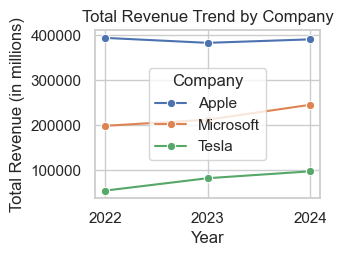

In [19]:
# Revenue Trend
plt.subplot(2, 2, 1)
sns.lineplot(x='Year', y='Total Revenue', hue='Company', data=data, marker='o')
plt.title('Total Revenue Trend by Company')
plt.ylabel('Total Revenue (in millions)')

Text(0, 0.5, 'Net Income (in millions)')

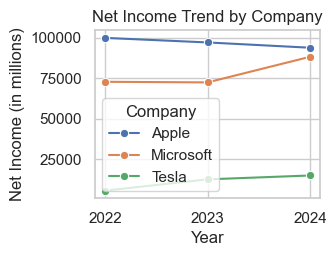

In [20]:
# Net Income Trend
plt.subplot(2, 2, 2)
sns.lineplot(x='Year', y='Net Income', hue='Company', data=data, marker='o')
plt.title('Net Income Trend by Company')
plt.ylabel('Net Income (in millions)')

Text(0, 0.5, 'Total Assets (in millions)')

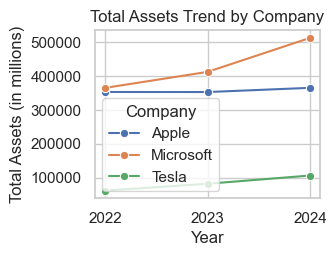

In [21]:
# Total Assets Trend
plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='Total Assets', hue='Company', data=data, marker='o')
plt.title('Total Assets Trend by Company')
plt.ylabel('Total Assets (in millions)')

Text(0, 0.5, 'Liabilities to Assets Ratio')

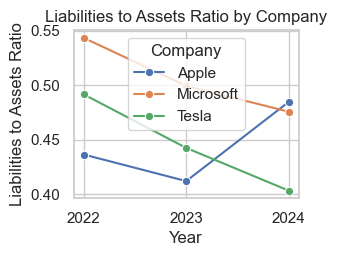

In [22]:
# Liabilities to Assets Ratio
data['Liabilities to Assets Ratio'] = data['Total Liabilities'] / data['Total Assets']
plt.subplot(2, 2, 4)
sns.lineplot(x='Year', y='Liabilities to Assets Ratio', hue='Company', data=data, marker='o')
plt.title('Liabilities to Assets Ratio by Company')
plt.ylabel('Liabilities to Assets Ratio')

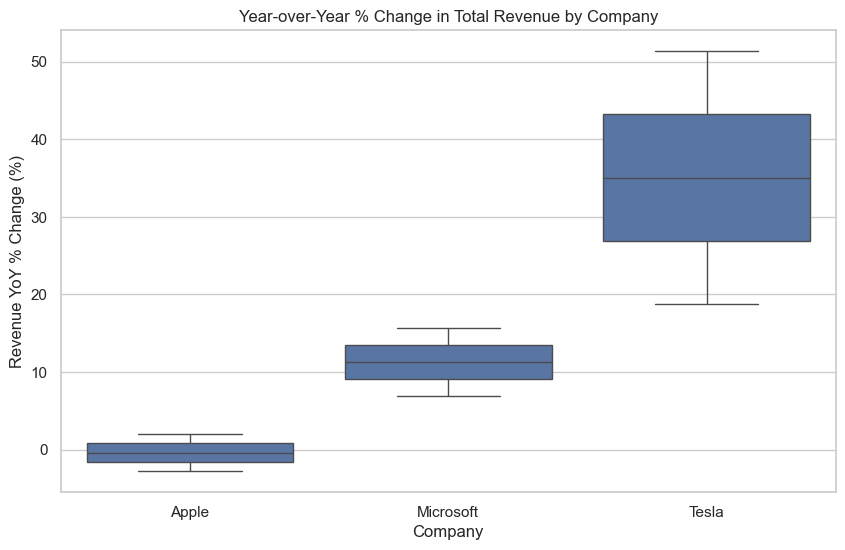

In [24]:
# Boxplot for Year-over-Year % Changes in Revenue by Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Total Revenue YoY % Change', data=data)
plt.title('Year-over-Year % Change in Total Revenue by Company')
plt.ylabel('Revenue YoY % Change (%)')
plt.show()

### Analysis Summary:

**Apple:**
- Experienced moderate YoY revenue changes, with stable revenue and cost control.
- Net income slightly decreased from 2022 to 2024, suggesting slight compression in profit margins.
- Total assets showed a modest increase, with relatively stable liabilities-to-assets ratio.

**Microsoft:**
- Had significant revenue and asset growth, particularly from 2023 to 2024, with a corresponding increase in liabilities.
- Net income grew significantly in 2024, reflecting improved profitability and potential market expansion.

**Tesla:**
- Revenue growth is strong YoY, suggesting rapid market share gains, though cost of sales increased correspondingly.
- Tesla’s liabilities-to-assets ratio is stable but indicates a leaner asset base than peers.
- Net income showed an upward trend, highlighting increased profitability.

### Key Focus for 10-K Filing Analysis:
- Year-over-year revenue and net income trends are crucial to evaluate growth and profitability.
- Liabilities-to-assets ratio provides insight into a company's financial leverage.
- Monitoring YoY changes in total revenue and net income gives a clear picture of operational efficiency and cost control.